In [2]:
%pylab inline

import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, \
    preprocess_input
from keras.layers import Dense, InputLayer, \
    Convolution2D, MaxPooling2D, Flatten

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [4]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [5]:
emergency_vehicles = glob('../datasets/emergency_classification/images/Emergency/*.jpg')
nonemergency_vehicles = glob('../datasets/emergency_classification/images/Non-Emergency/*.jpg')

In [6]:
len(emergency_vehicles), len(nonemergency_vehicles)

(991, 1361)

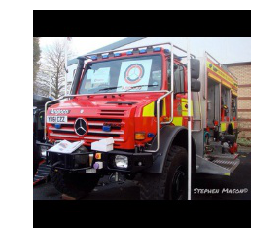

In [7]:
img_name = rng.choice(emergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

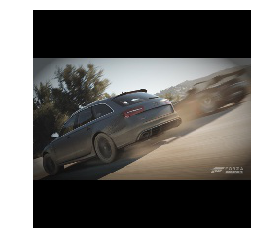

In [8]:
img_name = rng.choice(nonemergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [9]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc)
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [10]:
images.shape

(2352, 224, 224, 3)

In [11]:
train_x = images / images.max()
train_y = data.emergency_or_not.values

In [12]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [13]:
model = Sequential([
 InputLayer(input_shape=(224, 224, 3)),

 Convolution2D(25, (10, 10), activation='relu'),
 MaxPooling2D(pool_size=4),
    
  Convolution2D(25, (10, 10), activation='relu'),
 MaxPooling2D(pool_size=4),

 Flatten(),

 Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 215, 215, 25)      7525      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 25)        62525     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3025)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3026      
Total params: 73,076
Trainable params: 73,076
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6268 - acc: 0.6270 - val_loss: 0.6246 - val_acc: 0.6728
Epoch 2/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5804 - acc: 0.7005 - val_loss: 0.5820 - val_acc: 0.6912
Epoch 3/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5334 - acc: 0.7461 - val_loss: 0.5785 - val_acc: 0.7096
Epoch 4/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5061 - acc: 0.7649 - val_loss: 0.5502 - val_acc: 0.7295
Epoch 5/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.4723 - acc: 0.7801 - val_loss: 0.5414 - val_acc: 0.7380
Epoch 6/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.4711 - acc: 0.7819 - val_loss: 0.5474 - val_acc: 0.7337
Epoch 7/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.4505 - acc: 0.7916 - val_loss: 0.5131 - val_acc: 0.7521
Epoch 8/50
1646

In [18]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
all_vehicles = np.array(emergency_vehicles + nonemergency_vehicles)

_, valid_vehicles, _, valid_y = train_test_split(all_vehicles,train_y,test_size=0.3, random_state=42)

99 % sure that it is emergency


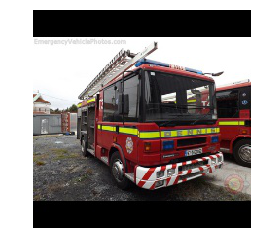

In [19]:
correct_predictions = valid_vehicles[predictions == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

12 % sure that it is emergency


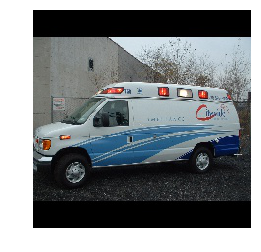

In [20]:
incorrect_predictions = valid_vehicles[predictions != Y_valid]
index = rng.choice(range(len(incorrect_predictions)))
img_name = incorrect_predictions[index]


prob = (prediction_probabilities[predictions != Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()